# IMPORTING THE LIBRARIES

In [1]:
# Data processing
import numpy as np # linear algebra
import pandas as pd # data processing

# Data visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Encoder
from sklearn.preprocessing import OrdinalEncoder

# ML classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestClassifier

# to split dataset to train and test
from sklearn.model_selection import train_test_split

# ML classifier model Evaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

# scaling 
from sklearn.preprocessing import StandardScaler

# to tune the model parameters
from sklearn.model_selection import RandomizedSearchCV

# To balance the over sampling we are using SMOTE
from imblearn.over_sampling import SMOTE

# Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# XG Boost Classifier
import xgboost as xgb

# Loading The Dataset

In [2]:
df=pd.read_csv(r"C:\Users\lavan\OneDrive\Documents\DataMining Project\BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Metadata Of Dataframe

In [3]:
# Checking the number of rows and columns
df.shape

(10127, 23)

Removing client number column because it is not necessary for analysis as it is a unique id

In [4]:
# Dropping the last two columns and the client number column
df = df.iloc[:,1:-2]

In [5]:
# After dropping the shape of the dataset 
df.shape

(10127, 20)

In [6]:
#The columns in the dataset
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
#The data types of the columns
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# Cleaning the Data

## Checking NAN Values 

In [8]:
# To know the number of NaN Values
nan_indices = df.isna().sum() 
print(nan_indices)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


There is no NaN Values in the Dataset

## Finding the duplicates from dataset

In [9]:
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


There is no duplicates in the dataset

# Statistical View of the Data

## Statistics of the numerical columns

In [10]:
# Checking the statistics of the numerical columns
stats = df.describe(exclude = 'object')
print(stats)

       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    

## Statistics of the Categorical data

In [11]:
# Statistics on Categorical data
stats_cat = df.describe(exclude = ['float', 'int64'])
print(stats_cat)

           Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436  


# Exploratory Data Analysis

## Exploring Target Variable 

In [12]:
target_df = df['Attrition_Flag'].value_counts().reset_index()
target_df.columns = ['Customer status','Count']
print(target_df)

     Customer status  Count
0  Existing Customer   8500
1  Attrited Customer   1627


C:\Users\lavan\AppData\Local\Temp\ipykernel_12144\2542248661.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


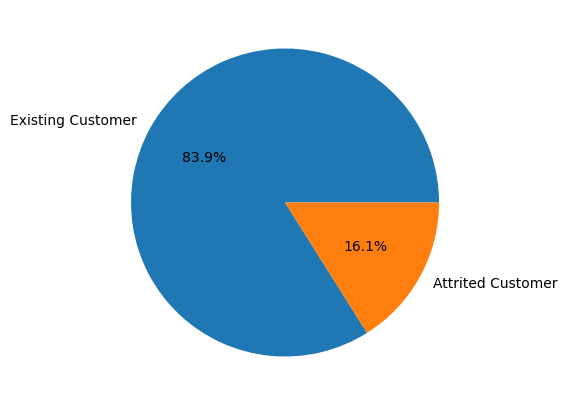

In [13]:
#PieChart
Customer_status = ['Existing Customer','Attrited Customer']
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(target_df['Count'], labels=Customer_status, autopct='%1.1f%%')
fig.show()

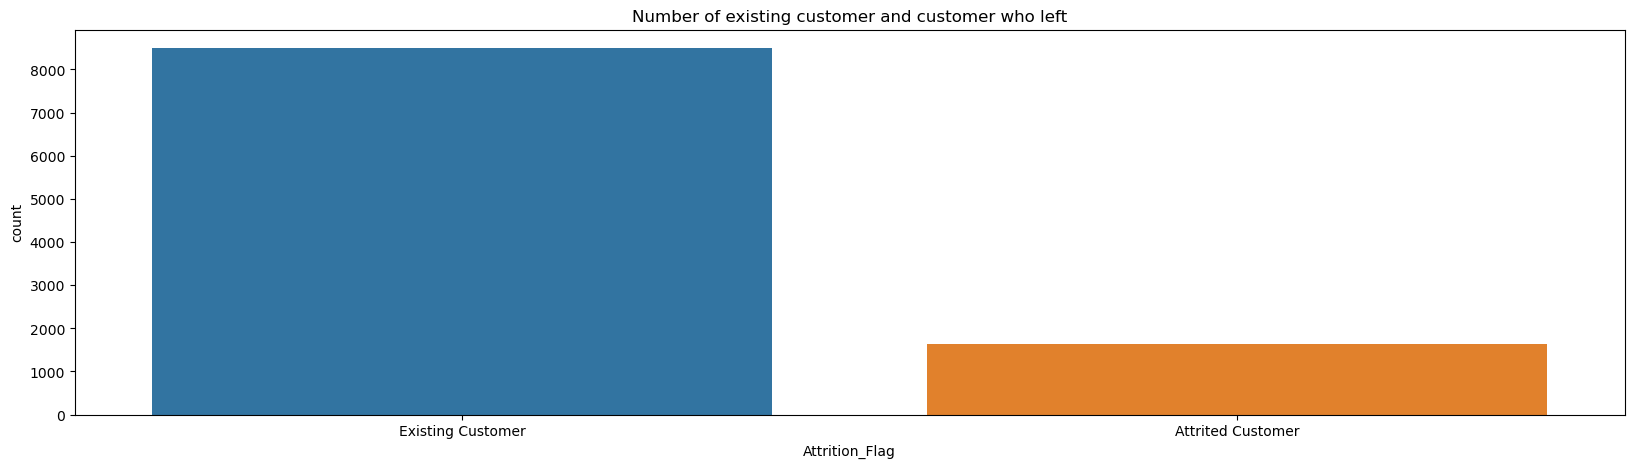

In [14]:
plt.figure(figsize = (20,5))
plt.title('Number of existing customer and customer who left');
countplt = sns.countplot(x='Attrition_Flag', data=df)

## Exploring Customer Age

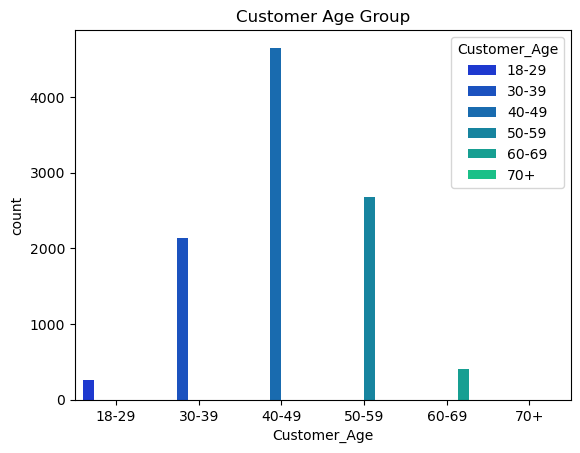

In [15]:
bins = [18, 30, 40, 50, 60, 70, 110]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
age = pd.cut(df['Customer_Age'], bins, labels=labels, include_lowest=True)
sns.countplot(x=age, palette='winter', hue=age)
plt.title('Customer Age Group')
plt.show()

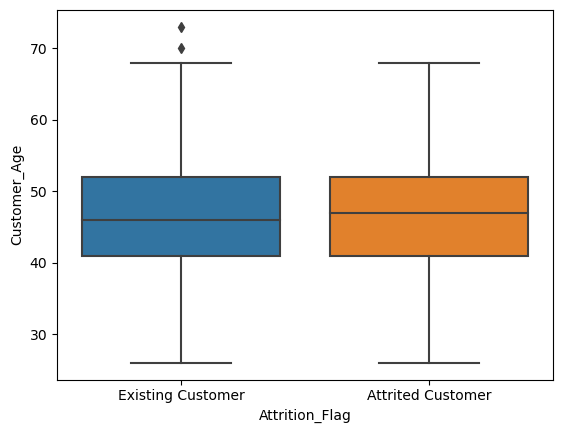

In [16]:
_box=sns.boxplot(data = df,x='Attrition_Flag',y='Customer_Age')

In [17]:
# Customer Age
left_customer = df[df['Attrition_Flag']=='Attrited Customer']
Existing_Customer = df[df['Attrition_Flag']=='Existing Customer']

print('Stats of Existing Customer Age',round(Existing_Customer['Customer_Age'].describe(),2))
print('Stats of Attrited Customer Age',round(left_customer['Customer_Age'].describe(),2))

Stats of Existing Customer Age count    8500.00
mean       46.26
std         8.08
min        26.00
25%        41.00
50%        46.00
75%        52.00
max        73.00
Name: Customer_Age, dtype: float64
Stats of Attrited Customer Age count    1627.00
mean       46.66
std         7.67
min        26.00
25%        41.00
50%        47.00
75%        52.00
max        68.00
Name: Customer_Age, dtype: float64


## Exploring the Gender

In [18]:
target_df = df['Gender'].value_counts().reset_index()
target_df.columns = ['Gender','Count']
print(target_df)

  Gender  Count
0      F   5358
1      M   4769


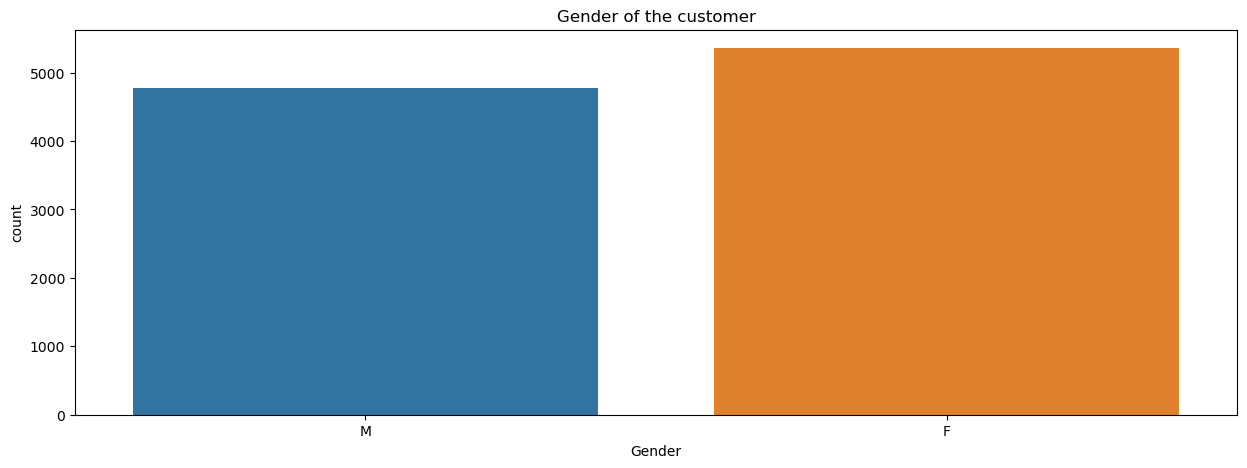

In [19]:
plt.figure(figsize = (15,5))
countplt = sns.countplot(x='Gender', data=df)
plt.title('Gender of the customer');

<Axes: title={'center': 'Gender with Churned or not'}, xlabel='Gender', ylabel='count'>

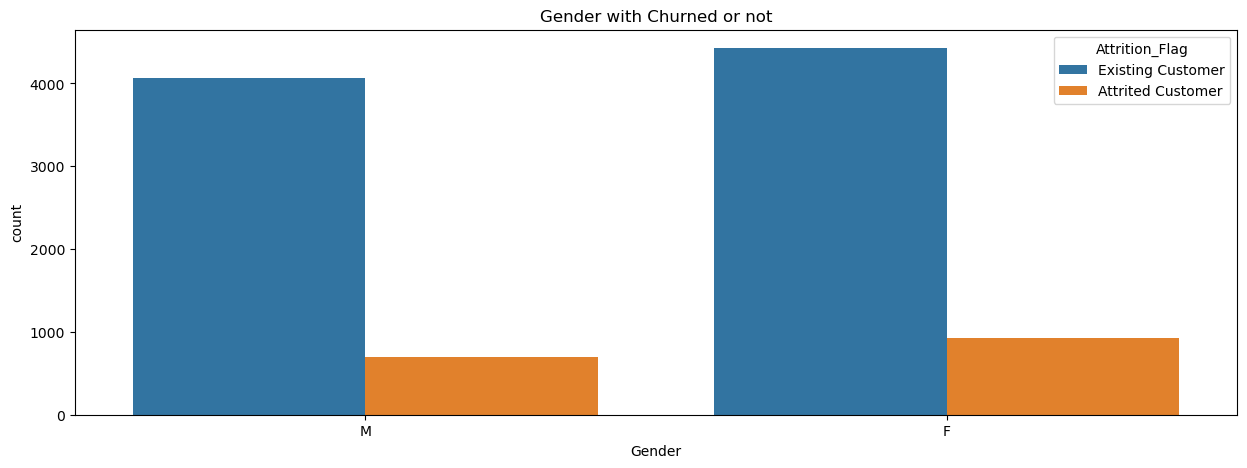

In [20]:
#countplot
plt.figure(figsize = (15,5))
plt.title("Gender with Churned or not")
sns.countplot(data = df, x = df["Gender"], hue = "Attrition_Flag")

## Exploring Education Level

In [21]:
target_df = df['Education_Level'].value_counts().reset_index()
target_df.columns = ['Education_Level','Count']
print(target_df)

  Education_Level  Count
0        Graduate   3128
1     High School   2013
2         Unknown   1519
3      Uneducated   1487
4         College   1013
5   Post-Graduate    516
6       Doctorate    451


In [22]:
# Churn rate by education level 
df.groupby('Education_Level')['Attrition_Flag'].value_counts()

Education_Level  Attrition_Flag   
College          Existing Customer     859
                 Attrited Customer     154
Doctorate        Existing Customer     356
                 Attrited Customer      95
Graduate         Existing Customer    2641
                 Attrited Customer     487
High School      Existing Customer    1707
                 Attrited Customer     306
Post-Graduate    Existing Customer     424
                 Attrited Customer      92
Uneducated       Existing Customer    1250
                 Attrited Customer     237
Unknown          Existing Customer    1263
                 Attrited Customer     256
Name: Attrition_Flag, dtype: int64

<Axes: title={'center': 'Education Level with Churned or not'}, xlabel='Education_Level', ylabel='count'>

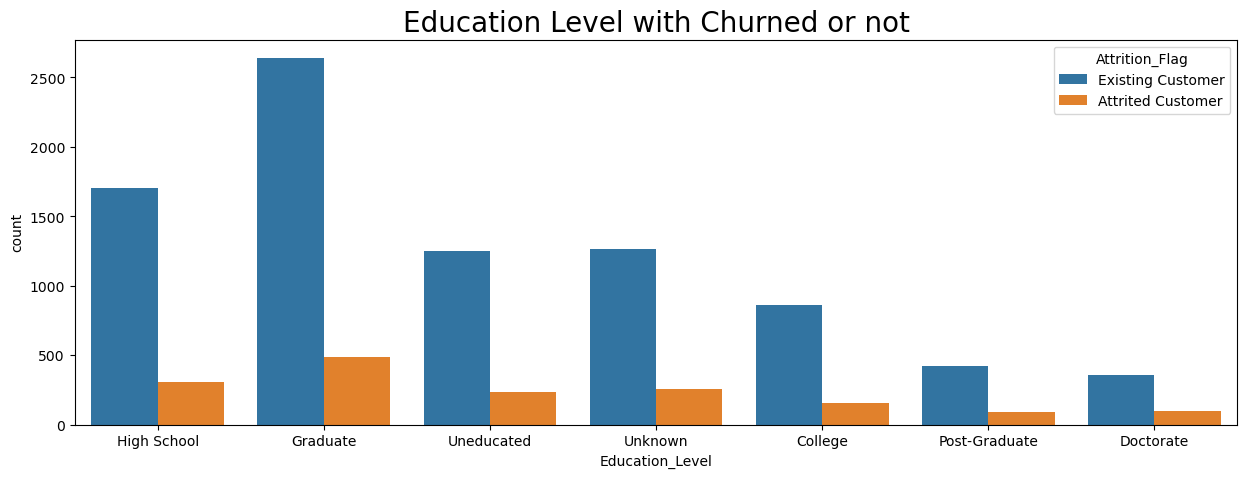

In [23]:
#countplot
plt.figure(figsize = (15,5))
plt.title("Education Level with Churned or not", fontsize = 20)
sns.countplot(data =df, x = "Education_Level", hue = "Attrition_Flag")

## Exploring Marriage Status

In [24]:
target_df = df['Marital_Status'].value_counts().reset_index()
target_df.columns = ['Marital_Status','Count']
print(target_df)

  Marital_Status  Count
0        Married   4687
1         Single   3943
2        Unknown    749
3       Divorced    748


In [25]:
# Churn rate by Marriage Status 
df.groupby('Marital_Status')['Attrition_Flag'].value_counts("percentage")

Marital_Status  Attrition_Flag   
Divorced        Existing Customer    0.838235
                Attrited Customer    0.161765
Married         Existing Customer    0.848731
                Attrited Customer    0.151269
Single          Existing Customer    0.830586
                Attrited Customer    0.169414
Unknown         Existing Customer    0.827770
                Attrited Customer    0.172230
Name: Attrition_Flag, dtype: float64

## Exploring Income Category

In [26]:
target_df = df['Income_Category'].value_counts().reset_index()
target_df.columns = ['Income_Category','Count']
print(target_df)

  Income_Category  Count
0  Less than $40K   3561
1     $40K - $60K   1790
2    $80K - $120K   1535
3     $60K - $80K   1402
4         Unknown   1112
5         $120K +    727


In [27]:
# Churn rate by income category
df.groupby('Income_Category')['Attrition_Flag'].value_counts()

Income_Category  Attrition_Flag   
$120K +          Existing Customer     601
                 Attrited Customer     126
$40K - $60K      Existing Customer    1519
                 Attrited Customer     271
$60K - $80K      Existing Customer    1213
                 Attrited Customer     189
$80K - $120K     Existing Customer    1293
                 Attrited Customer     242
Less than $40K   Existing Customer    2949
                 Attrited Customer     612
Unknown          Existing Customer     925
                 Attrited Customer     187
Name: Attrition_Flag, dtype: int64

<Axes: title={'center': 'Income Category of Customers'}, xlabel='Income_Category', ylabel='count'>

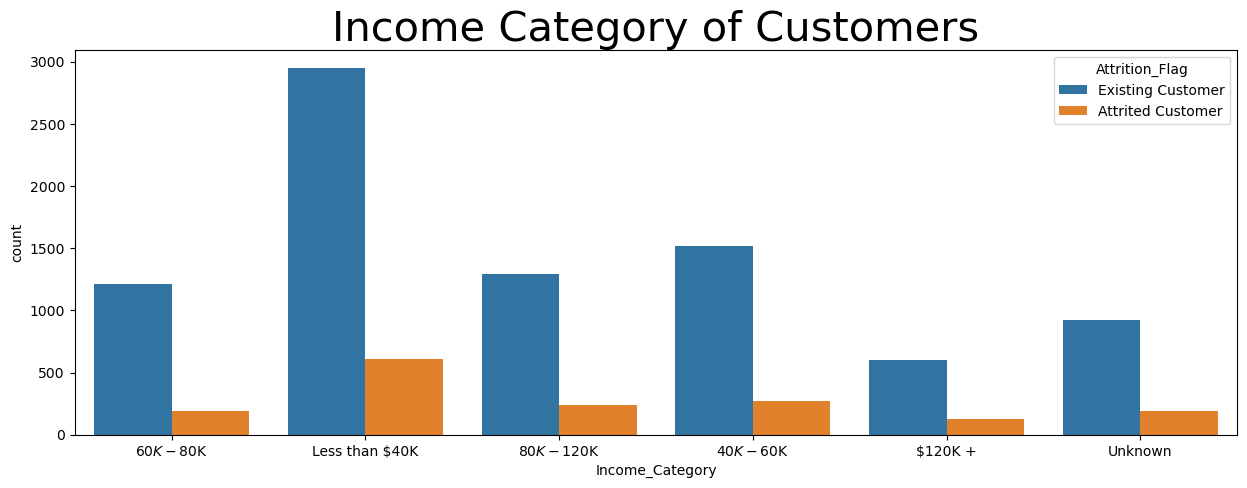

In [28]:
plt.figure(figsize = (15,5))
plt.title("Income Category of Customers", fontsize = 30)
sns.countplot(x=df['Income_Category'],hue=df['Attrition_Flag'])

## Exploring Months Inactive in last 12 month

In [29]:
target_df = df['Months_Inactive_12_mon'].value_counts().reset_index()
target_df.columns = ['Months_Inactive_12_mon','Count']
print(target_df)

   Months_Inactive_12_mon  Count
0                       3   3846
1                       2   3282
2                       1   2233
3                       4    435
4                       5    178
5                       6    124
6                       0     29


<Axes: title={'center': 'Months Inactive in last 12 month'}, xlabel='Months_Inactive_12_mon', ylabel='count'>

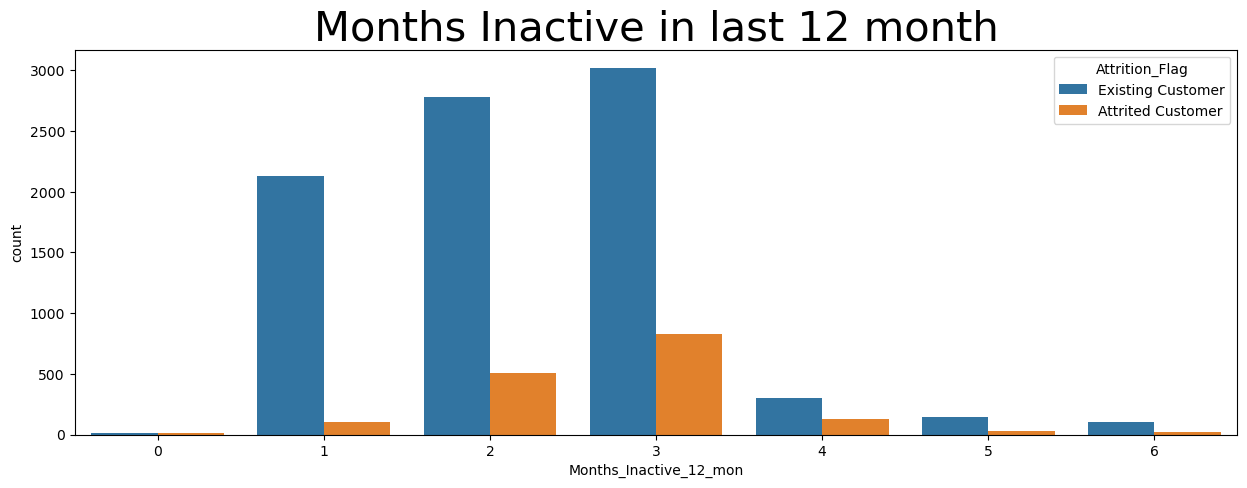

In [30]:
plt.figure(figsize = (15,5))
plt.title("Months Inactive in last 12 month", fontsize = 30)
sns.countplot(x=df['Months_Inactive_12_mon'],hue=df['Attrition_Flag'])

Text(0.5, 1.0, 'Inactive months vs Churn')

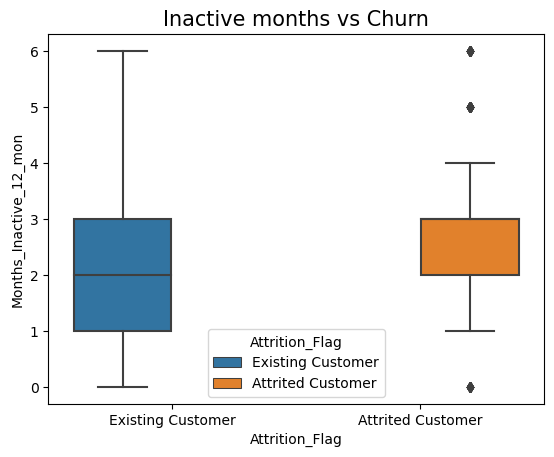

In [31]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon",
            hue="Attrition_Flag",data=df).set_title("Inactive months vs Churn", fontsize=15)

## Comparision 

### Plotting the Relation Between Credit limit vs. Avg utilization ratio

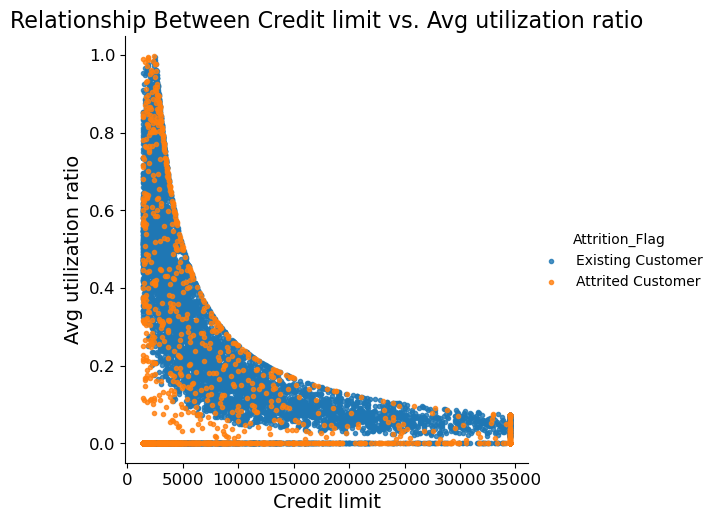

In [32]:
sns.lmplot(x='Credit_Limit', y='Avg_Utilization_Ratio', data=df, markers ='.', hue='Attrition_Flag', fit_reg=False, height=5)
plt.title('Relationship Between Credit limit vs. Avg utilization ratio', size=16)
plt.xlabel('Credit limit', size=14) 
plt.ylabel('Avg utilization ratio', size=14)
plt.tick_params(labelsize=12)
plt.show()

There is a negative correlation between credit limit and utilization ratio. Customers with higher credit limits tend to have lower utilization ratios. The customers with higher utilization ratios are more likely to churn. Maintaining a lower utilization ratio seems associated with better retention for the bank.

### Plotting the relation between Age and Credit Card limit

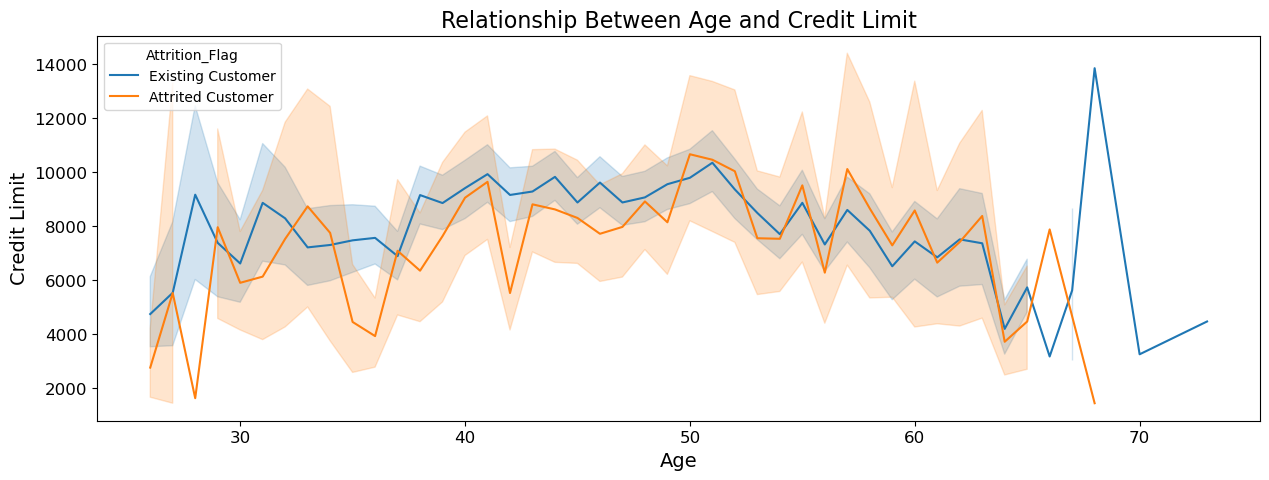

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='Customer_Age', y='Credit_Limit', hue='Attrition_Flag')
plt.title('Relationship Between Age and Credit Limit', size=16)
plt.xlabel('Age', size=14) 
plt.ylabel('Credit Limit', size=14)
plt.tick_params(labelsize=12)
plt.show()

Both Existing and churned customers peak average limit around 50 years old. The difference in average limit between Existing and churned widens in the middle age groups before converging again for older customers.

## Conclusion from EDA

Based on the EDA, we can determine that the customer who cancelled their credit card service is a female between the ages of 40 and 50, with a graduate degree, an income below $40K, and three months of inactivity. These factors increase the likelihood of the customer being Churned.

# Changing the Categorical data value to Numerical Values

In [34]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [35]:
Attrition_Flag = df[['Attrition_Flag']]

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Existing Customer', 'Attrited Customer']])

# Fit and transform the data using the encoder
encoded_Attrition_Flag = encoder.fit_transform(Attrition_Flag)


In [36]:
df['encoded_Attrition_Flag']=encoded_Attrition_Flag.astype(int)

In [37]:
df[['encoded_Attrition_Flag','Attrition_Flag']].head()

,encoded_Attrition_Flag,Attrition_Flag
0,0,Existing Customer
1,0,Existing Customer
2,0,Existing Customer
3,0,Existing Customer
4,0,Existing Customer


In [38]:
categorical_columns =['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
numerical_columns =['Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

## Card Category

In [39]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [40]:
# Sample data with 'Card_Category' column
card_category = df[['Card_Category']]

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Blue', 'Gold', 'Silver','Platinum']])

# Fit and transform the data using the encoder
encoded_card_category = encoder.fit_transform(card_category)


In [41]:
df['encoded_card_category']=encoded_card_category.astype(int)

In [42]:
df[['encoded_card_category','Card_Category']].head()

,encoded_card_category,Card_Category
0,0,Blue
1,0,Blue
2,0,Blue
3,0,Blue
4,0,Blue


## Education_Level

In [43]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [44]:
# Sample data with 'Card_Category' column
Education_Level = df[['Education_Level']]

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Uneducated','Unknown','High School','College','Graduate','Post-Graduate', 'Doctorate']])

# Fit and transform the data using the encoder
encoded_Education_Level = encoder.fit_transform(Education_Level)

In [45]:
df['encoded_Education_Level']=encoded_Education_Level.astype(int)

In [46]:
df[['encoded_Education_Level','Education_Level']].head()

,encoded_Education_Level,Education_Level
0,2,High School
1,4,Graduate
2,4,Graduate
3,2,High School
4,0,Uneducated


## Income_Category

In [47]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [48]:
# Sample data with 'Card_Category' column
Income_Category = df[['Income_Category']]

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Unknown', 'Less than $40K','$40K - $60K','$60K - $80K', '$80K - $120K', '$120K +']])

# Fit and transform the data using the encoder
encoded_Income_Category = encoder.fit_transform(Income_Category)

In [49]:
df['encoded_Income_Category']=encoded_Income_Category.astype(int)

In [50]:
df[['encoded_Income_Category','Income_Category']].head()

,encoded_Income_Category,Income_Category
0,3,$60K - $80K
1,1,Less than $40K
2,4,$80K - $120K
3,1,Less than $40K
4,3,$60K - $80K


## Gender

In [51]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [52]:
Gender=df[['Gender']]

# Using pandas get_dummies() function for one-hot encoding
encoded_Gender = pd.get_dummies(Gender, columns=['Gender'])

In [53]:
df['Gender_M']=encoded_Gender['Gender_M'].astype(int)

In [54]:
df[['Gender_M','Gender']].head()

,Gender_M,Gender
0,1,M
1,0,F
2,1,M
3,0,F
4,1,M


## Marital Status

In [55]:
# Sample data with 'Card_Category' column
Marital_Category = df[['Marital_Status']]

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Married', 'Single', 'Unknown', 'Divorced']])

# Fit and transform the data using the encoder
encoded_Marital_Status = encoder.fit_transform(Marital_Category)

In [56]:
df['encoded_Marital_Status']=encoded_Marital_Status.astype(int)

In [57]:
df[['encoded_Marital_Status','Marital_Status']].head()

,encoded_Marital_Status,Marital_Status
0,0,Married
1,1,Single
2,0,Married
3,2,Unknown
4,0,Married


## Dropping colums after converting Categorical Values

In [58]:
cols_to_drop = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
df_new = df.drop(cols_to_drop, axis=1)

In [59]:
df_new.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,encoded_Attrition_Flag,encoded_card_category,encoded_Education_Level,encoded_Income_Category,Gender_M,encoded_Marital_Status
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,2,3,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,4,1,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,4,4,1,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,2,1,0,2
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,3,1,0


# Correlation between Input and Taget Variable


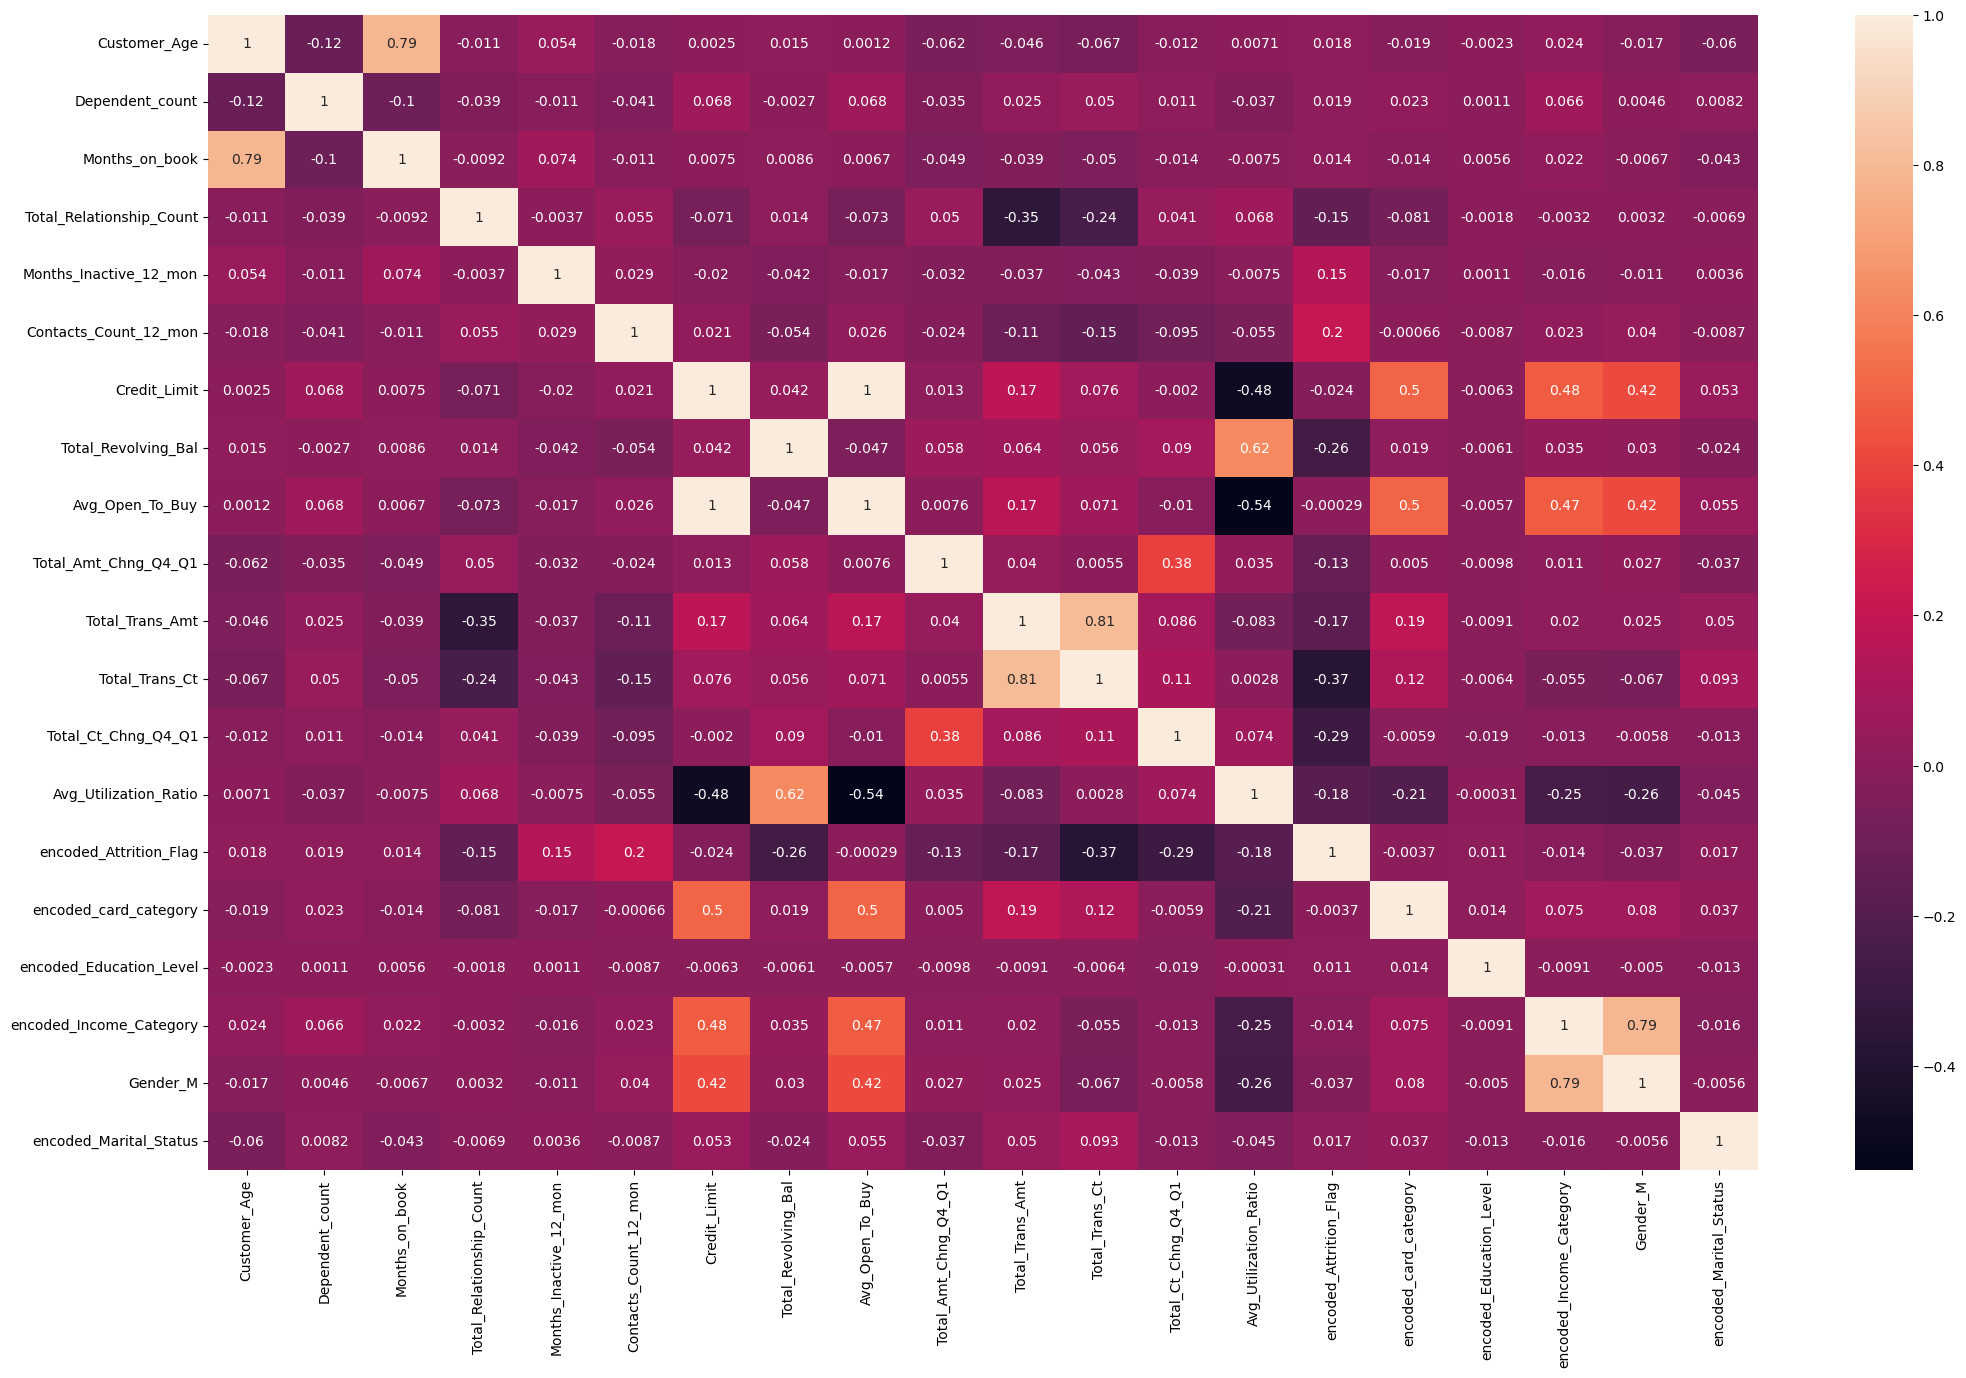

In [60]:
plt.figure(figsize=(25, 15))  # You can adjust the figsize as needed

corr_matrix = df_new.corr()

sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

plt.show()


We see above that the following features are not correlated with customer churn:
1.Average Open To Buy
2.Encoded card category

## Dropping the Non Correlated Column

In [61]:
NCRcols_to_drop = ['Avg_Open_To_Buy','encoded_card_category']
df_new = df_new.drop(NCRcols_to_drop, axis=1)

In [62]:
df_new

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,encoded_Attrition_Flag,encoded_Education_Level,encoded_Income_Category,Gender_M,encoded_Marital_Status
0,45,3,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,0,2,3,1,0
1,49,5,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,0,4,1,0,1
2,51,3,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,0,4,4,1,0
3,40,4,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,0,2,1,0,2
4,40,3,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462,0,4,2,1,1
10123,41,2,25,4,2,3,4277.0,2186,0.804,8764,69,0.683,0.511,1,1,2,1,3
10124,44,1,36,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000,1,2,1,0,0
10125,30,2,36,4,3,3,5281.0,0,0.535,8395,62,0.722,0.000,1,4,2,1,2


# Spliting the dataset

In [63]:
X = df_new.loc[:, df_new.columns != 'encoded_Attrition_Flag']
y = df_new['encoded_Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balancing Over Sampling

In [64]:
smote_sample = SMOTE(sampling_strategy='minority', k_neighbors=20, random_state=42)
X_train_sm, y_train_sm = smote_sample.fit_resample(X_train, y_train)

# Decision Trees

Decision Tree Accuracy: 92.37%


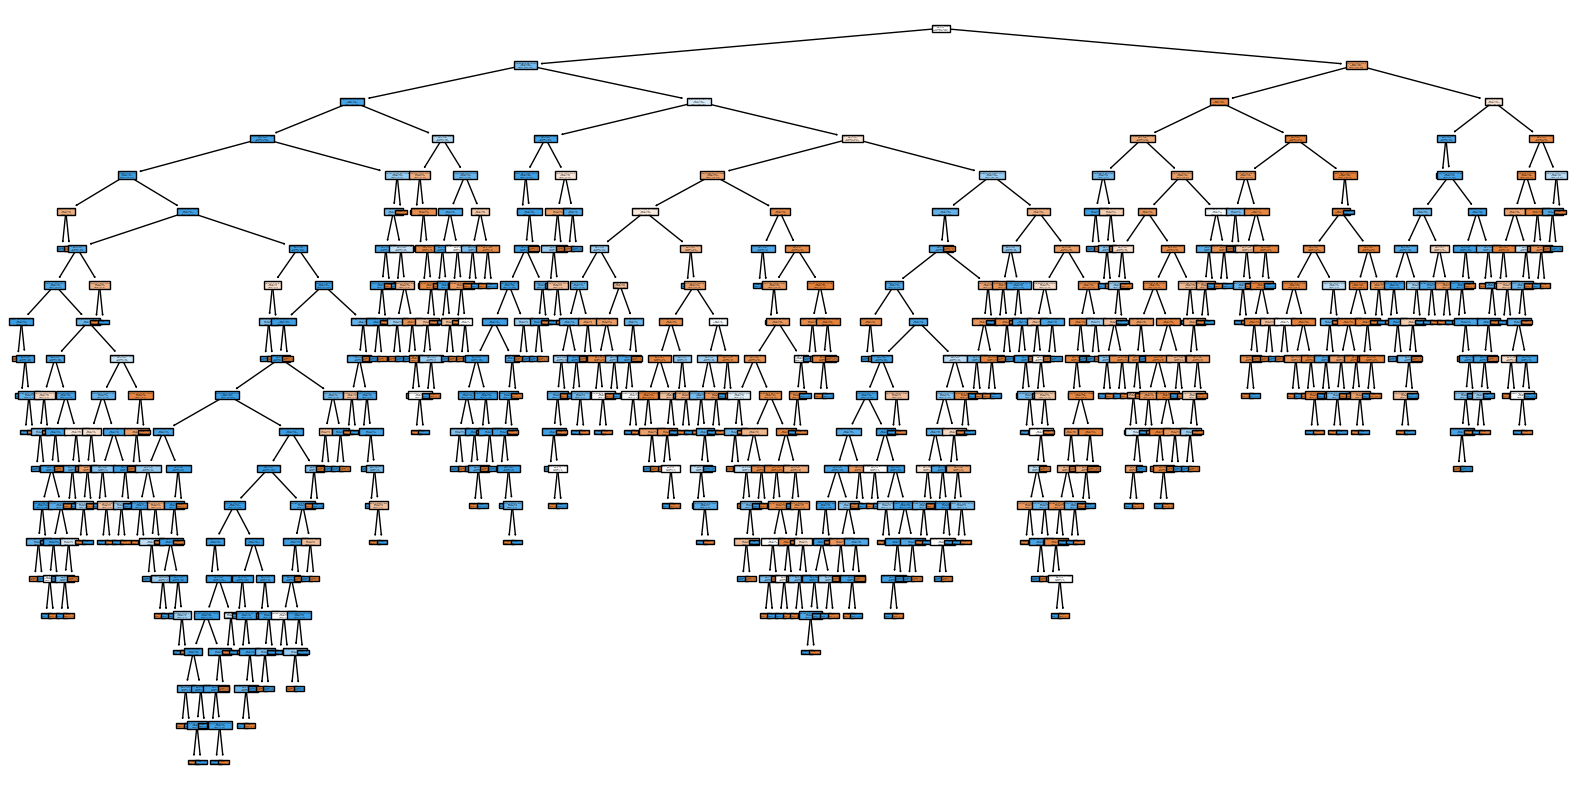

In [65]:
dt = DecisionTreeClassifier()
#fit the tree dt
dt.fit(X_train_sm, y_train_sm)
y_pred1 = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f"Decision Tree Accuracy: {accuracy*100:.2f}%")
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True , feature_names=df_new.columns.tolist())
plt.show()

# Gradient Boosting

In [66]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
gb.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [67]:
y_pred2 = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f"Gradient Boosting Accuracy: {accuracy*100:.2f}%")

Gradient Boosting Accuracy: 94.44%


# XG Boost

In [68]:
clf = xgb.XGBClassifier()
# fit the clf
clf.fit(X_train_sm, y_train_sm)
y_pred3 = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print(f"XGBoost Accuracy: {accuracy*100:.2f}%")

XGBoost Accuracy: 95.89%


We got the accuracy 95.89 in XG Boost Algorithm.

# Confusion Matrix

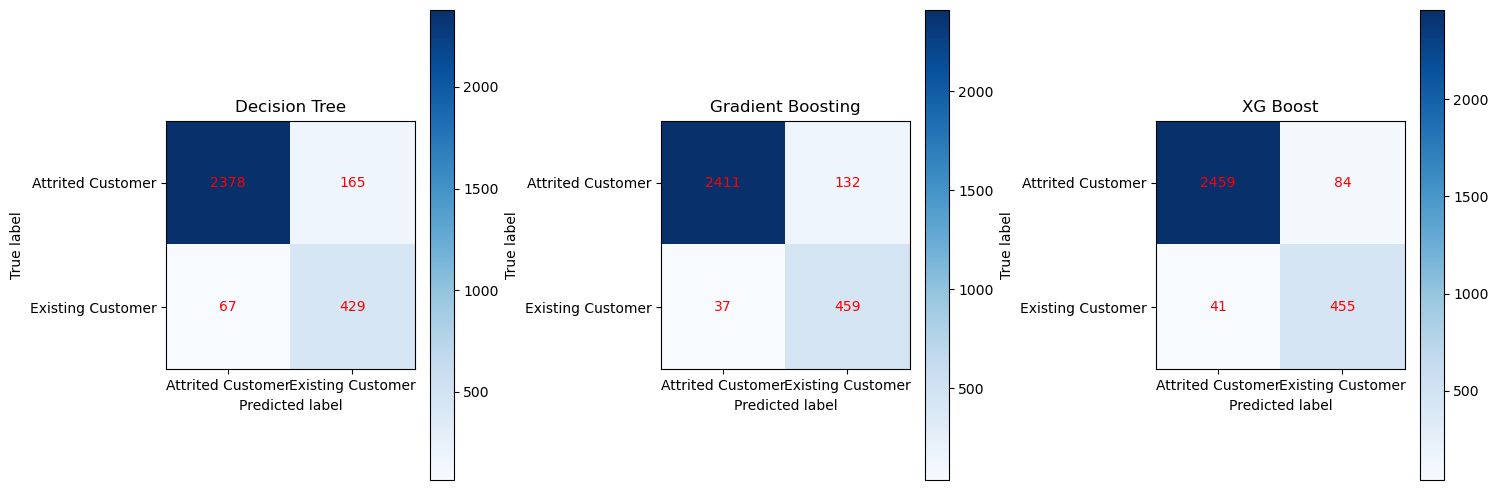

In [69]:
# Compute confusion matrices
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

# Define a function to plot a confusion matrix
def plot_confusion_matrix(cm, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)  # Assuming binary classification (0 and 1)
    plt.xticks(tick_marks, ['Attrited Customer', 'Existing Customer'])
    plt.yticks(tick_marks, ['Attrited Customer', 'Existing Customer'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   
    # Displaying the confusion_matrix values 
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

# Create subplots for the confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_confusion_matrix(cm1, "Decision Tree")

plt.subplot(132)
plot_confusion_matrix(cm2, "Gradient Boosting")

plt.subplot(133)
plot_confusion_matrix(cm3, "XG Boost")

plt.tight_layout()
plt.show()